<a href="https://colab.research.google.com/github/Tarun7386/Machine-Learning-Projects/blob/YBI-Foundation/Bank_Customer_Churn_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Bank Customer Churn Model**





-------------

# **Objective**

***Why a Bank Customer Churn Model is Used***
* Keeping Customers: The model helps the bank know which customers might leave soon. This way, the bank can try to keep them by offering special deals or better service.

* Saving Money: It's cheaper to keep existing customers than to find new ones. The model helps the bank spend money wisely by focusing on keeping current customers.

* Improving Service: By understanding why customers leave, the bank can fix those issues and make their services better, making customers happier.

* Protecting Revenue: When customers leave, the bank loses money. The model helps the bank prevent these losses by keeping more customers.

* Staying Ahead: Banks that use this model can be better than their competitors because they can keep their customers happier and loyal.

#**Data Source**



**Dataset Name**: Bank Customer Churn Dataset

**Description**: This dataset includes information about bank customers such as credit scores, geography, gender, age, and account details. It is used to predict whether a customer will churn based on these features.

**Source**: The dataset is available on [YBI foundation Data Set](https://github.com/YBI-Foundation/Dataset).



**Size**: The dataset comprises 10,000 records and 13 features.

**Format**: CSV file format.

**Collection Method**: The data was collected from bank transactions and customer profiles over a 12-month period.

**Usage**: This dataset is used for building and evaluating predictive models for customer churn in the banking industry.




#**Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#**Import Data**

In [2]:
df=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

#**Describe Data**

In [ ]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [ ]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [3]:
df.duplicated('CustomerId').sum()

0

#**Data Visualization**

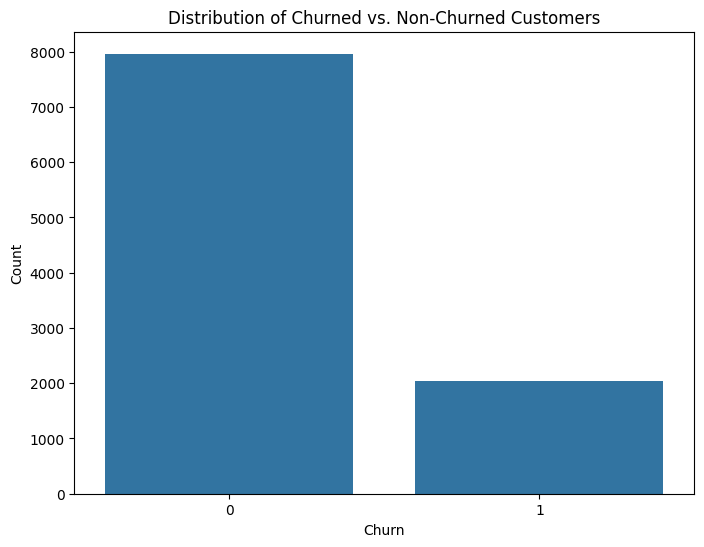

In [104]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Churn')
plt.title('Distribution of Churned vs. Non-Churned Customers')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


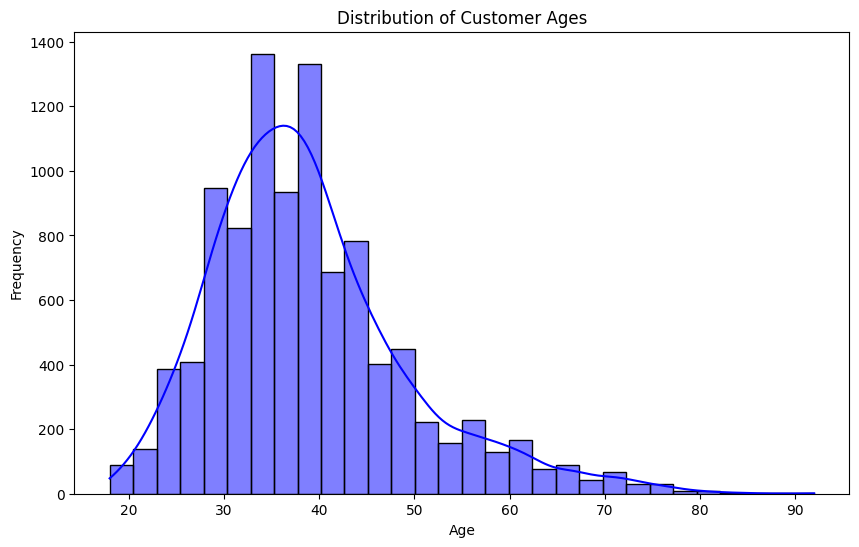

In [105]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='blue')
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


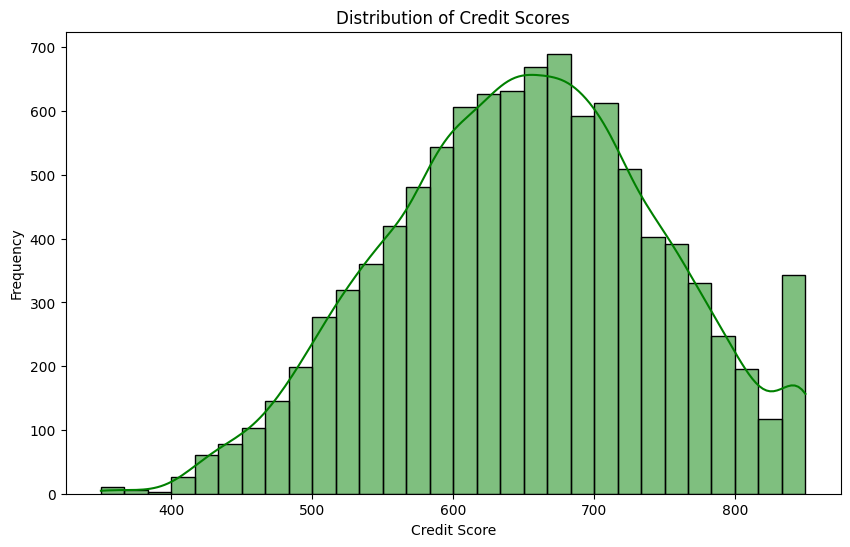

In [106]:
plt.figure(figsize=(10, 6))
sns.histplot(df['CreditScore'], bins=30, kde=True, color='green')
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()


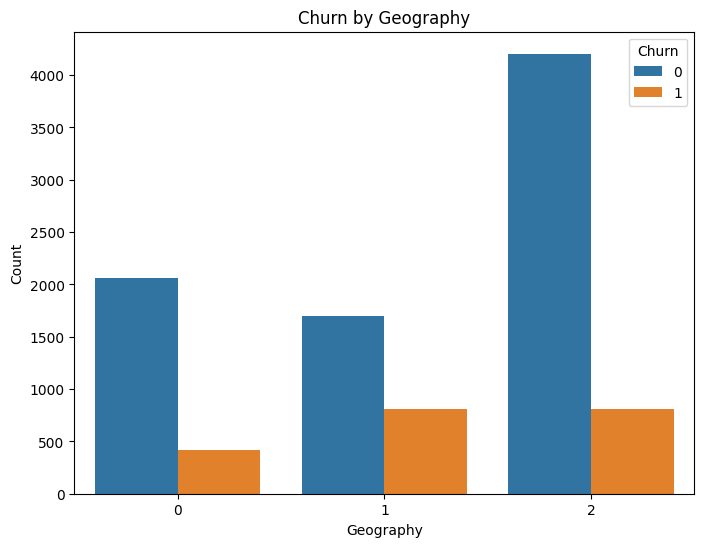

In [107]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Geography', hue='Churn')
plt.title('Churn by Geography')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()


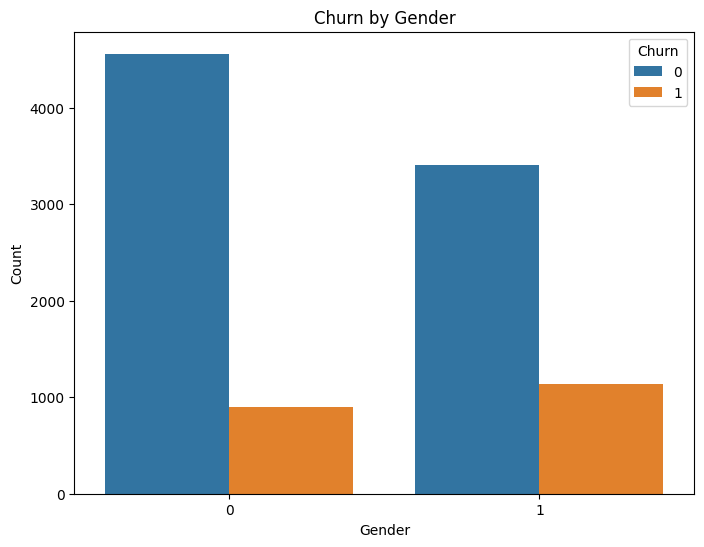

In [108]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', hue='Churn')
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()


## **Define Target Variable (y) and Feature Variables (X)**

In [10]:
x=df.drop(['Surname','Churn'],axis=1)


In [11]:
y=df['Churn']

In [ ]:
x.shape,y.shape

((10000, 11), (10000,))

In [12]:
df['Churn'].value_counts()

,count
Churn,
0,7963
1,2037


Random Under Sampling

 ***Random  under-sampling reduces the number of instances in the majority class, thereby balancing the class distribution. This allows the model to learn from both classes more equally.***

In [13]:
from imblearn.under_sampling import RandomUnderSampler

In [14]:
rus=RandomUnderSampler(random_state=2529)

**x:**This is the feature matrix (independent variables) of the dataset. It contains the data points used for training the model.

**y:** This is the target vector (dependent variable) of the dataset. It contains the labels or classes associated with each data point in x.

In [15]:
x_rus,y_rus=rus.fit_resample(x,y) # Apply random under-sampling

In [ ]:
x_rus.shape,y_rus.shape,x.shape,y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [16]:
y.value_counts()

,count
Churn,
0,7963
1,2037


In [17]:
y_rus.value_counts()

,count
Churn,
0,2037
1,2037


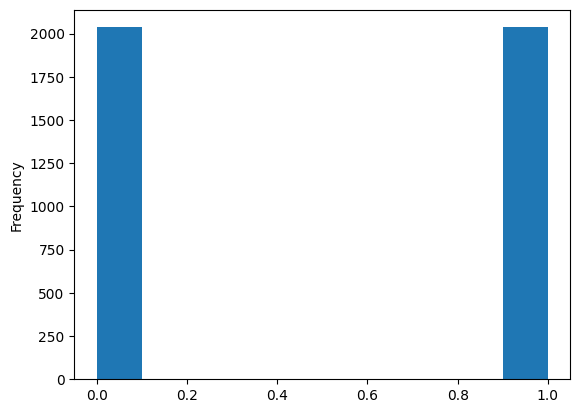

In [18]:
y_rus.plot(kind='hist');

Random Over Sampling

In [19]:
from imblearn.over_sampling import RandomOverSampler

In [20]:
ros=RandomOverSampler(random_state=2529)

In [21]:
x_ros,y_ros=ros.fit_resample(x,y)

In [ ]:
x_ros.shape,y_ros.shape,x.shape,y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [22]:
y.value_counts()

,count
Churn,
0,7963
1,2037


In [23]:
y_ros.value_counts()

,count
Churn,
1,7963
0,7963


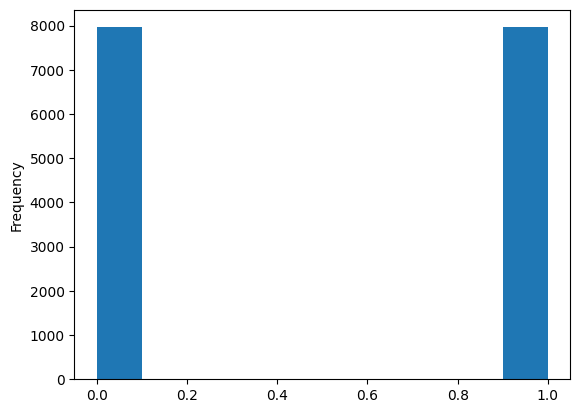

In [24]:
y_ros.plot(kind='hist');

#**Data Preprocessing**

In [4]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [5]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [6]:
df.replace({'Geography':{'France':2,'Germany':1,'Spain':0}},inplace=True)

In [7]:
df.replace({'Gender':{'Male':0,'Female':1}},inplace=True)

In [8]:
df['Num Of Products'].value_counts()

,count
Num Of Products,
1,5084
2,4590
3,266
4,60


* 0: The customer did not churn (they are still a customer).
* 1: The customer churned (they are no longer a customer).

In [9]:
df.groupby(['Churn','Geography']).count()

CustomerId  Surname  CreditScore  Gender   Age  Tenure  \
Churn Geography                                                           
0     0                2064     2064         2064    2064  2064    2064   
      1                1695     1695         1695    1695  1695    1695   
      2                4204     4204         4204    4204  4204    4204   
1     0                 413      413          413     413   413     413   
      1                 814      814          814     814   814     814   
      2                 810      810          810     810   810     810   

                 Balance  Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                                
0     0             2064             2064             2064              2064   
      1             1695             1695             1695              1695   
      2             4204             4204             4204              4204   
1     0              413              413              413               413   
      1              814              814              814               814   
      2              810              810              810               810   

                 Estimated Salary  
Churn Geography                    
0     0                      2064  
      1                      1695  
      2                      4204  
1     0                       413  
      1                       814  
      2                       810

Modeling

In [ ]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn'],
      dtype='object')

#**Train Test Split**

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2529)

In [27]:
x_train_rus,x_test_rus,y_train_rus,y_test_rus=train_test_split(x_rus,y_rus,test_size=0.3,random_state=2529)

In [28]:
x_train_ros,x_test_ros,y_train_ros,y_test_ros=train_test_split(x_ros,y_ros,test_size=0.3,random_state=2529)

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
sc=StandardScaler()

In [31]:
x_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(x_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [32]:
x_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(x_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [33]:
x_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(x_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [34]:
x_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(x_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [35]:
x_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(x_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [36]:
x_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(x_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

#**Modeling**

In [81]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report

In [82]:
# Support vector Machine Classifier
svc=SVC()
svc_rus=SVC()
svc_ros=SVC()

In [85]:
svc.fit(x_train,y_train)
svc_ros.fit(x_train_ros,y_train_ros)
svc_rus.fit(x_train_rus,y_train_rus)

SVC()

In [86]:
# Hyper Parameter Tunning
from sklearn.model_selection import GridSearchCV

In [101]:
param_grid={
    'C':[0.1,1,10],
    'kernel':['rbf'],
    'class_weight':['balanced']
}
param_grid_rus={
    'C':[0.1,1,10],
    'gamma':[1,0.1,0.01],
    'kernel':['rbf'],
    'class_weight':['balanced']
}
param_grid_ros={
    'C':[0.1,1,10],
    'gamma':[1,0.1,0.01],
    'kernel':['rbf'],
    'class_weight':['balanced']
}

In [90]:
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid_rus=GridSearchCV(SVC(),param_grid_rus,refit=True,verbose=2,cv=2)
grid_ros=GridSearchCV(SVC(),param_grid_ros,refit=True,verbose=2,cv=2)

In [91]:
grid.fit(x_train,y_train)
grid_rus.fit(x_train_rus,y_train_rus)
grid_ros.fit(x_train_ros,y_train_ros)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END C=0.1, class_weight=balanced, kernel=rbf;, score=0.207 total time=   2.4s
[CV 2/5] END C=0.1, class_weight=balanced, kernel=rbf;, score=0.207 total time=   2.2s
[CV 3/5] END C=0.1, class_weight=balanced, kernel=rbf;, score=0.207 total time=   3.2s
[CV 4/5] END C=0.1, class_weight=balanced, kernel=rbf;, score=0.207 total time=   4.3s
[CV 5/5] END C=0.1, class_weight=balanced, kernel=rbf;, score=0.792 total time=   2.3s
[CV 1/5] END C=1, class_weight=balanced, kernel=rbf;, score=0.793 total time=   2.2s
[CV 2/5] END C=1, class_weight=balanced, kernel=rbf;, score=0.793 total time=   2.4s
[CV 3/5] END C=1, class_weight=balanced, kernel=rbf;, score=0.793 total time=   3.9s
[CV 4/5] END C=1, class_weight=balanced, kernel=rbf;, score=0.793 total time=   2.4s
[CV 5/5] END C=1, class_weight=balanced, kernel=rbf;, score=0.792 total time=   2.3s
[CV 1/5] END C=10, class_weight=balanced, kernel=rbf;, score=0.793 total time=  

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [92]:
print(grid.best_estimator_)
print(grid_rus.best_estimator_)
print(grid_ros.best_estimator_)

SVC(C=1, class_weight='balanced')
SVC(C=1, class_weight='balanced', gamma=0.1)
SVC(C=1, class_weight='balanced', gamma=1)


In [103]:
y_pred=svc.predict(x_test)
y_pred_rus=svc_rus.predict(x_test_rus)
y_pred_ros=svc_ros.predict(x_test_ros)
grid_predications=grid.predict(x_test)
grid_predications_rus=grid_rus.predict(x_test_rus)
grid_predications_ros=grid_ros.predict(x_test_ros)

# **Model Evaluation**

In [95]:
# A confusion matrix is a table that is used to describe the performance of a classification model
confusion_matrix(y_test,y_pred)

array([[2414,    0],
       [ 586,    0]])

In [100]:
confusion_matrix(y_test_rus,y_pred_rus)

array([[  0, 627],
       [  0, 596]])

In [96]:
confusion_matrix(y_test_ros,y_pred_ros)

array([[2379,    0],
       [2399,    0]])

In [97]:
confusion_matrix(y_test,grid_predications)

array([[   0, 2414],
       [   0,  586]])

In [98]:
confusion_matrix(y_test_rus,grid_predications_rus)

array([[ 26, 601],
       [ 24, 572]])

In [99]:
confusion_matrix(y_test_ros,grid_predications_ros)

array([[2379,    0],
       [ 125, 2274]])

# **Prediction**

**Classification Reports**

In [64]:
print(classification_report(y_test_rus,grid_predications_rus))

              precision    recall  f1-score   support

           0       0.52      0.04      0.08       627
           1       0.49      0.96      0.65       596

    accuracy                           0.49      1223
   macro avg       0.50      0.50      0.36      1223
weighted avg       0.50      0.49      0.35      1223



In [69]:
print(classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.50      1.00      0.66      2379
           1       0.00      0.00      0.00      2399

    accuracy                           0.50      4778
   macro avg       0.25      0.50      0.33      4778
weighted avg       0.25      0.50      0.33      4778



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
print(classification_report(y_test_ros,grid_predications_ros))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2379
           1       1.00      0.95      0.97      2399

    accuracy                           0.97      4778
   macro avg       0.98      0.97      0.97      4778
weighted avg       0.98      0.97      0.97      4778



In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2414
           1       0.00      0.00      0.00       586

    accuracy                           0.80      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.80      0.72      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
print(classification_report(y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       627
           1       0.49      1.00      0.66       596

    accuracy                           0.49      1223
   macro avg       0.24      0.50      0.33      1223
weighted avg       0.24      0.49      0.32      1223



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
print(classification_report(y_test,grid_predications))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2414
           1       0.20      1.00      0.33       586

    accuracy                           0.20      3000
   macro avg       0.10      0.50      0.16      3000
weighted avg       0.04      0.20      0.06      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Explantion**

##  Accuracy for y_test_rus and y_pred_rus:
**Accuracy**: 0.49 (49%)<br>
**Explanation**: After applying Random Under-Sampling (RUS), the model's accuracy drops significantly. The lower accuracy reflects the model's struggle to balance performance between the two classes, especially since it performs poorly on the majority class (class 0).

---


## Accuracy for y_test_ros and y_pred_ros:

**Accuracy**: 0.50 (50%)<br>
**Explanation**: After applying Random Over-Sampling (ROS), the model's accuracy is around chance level. This indicates that the model is having difficulty distinguishing between classes, even though both classes are represented equally.


---

## Accuracy for y_test and grid_predications:
**Accuracy**: 0.80 (80%)<br>
**Explanation**: The model correctly predicts the majority class (class 0) most of the time. However, it fails to predict the minority class (class 1) correctly at all. The high accuracy is misleading because it primarily reflects the model's performance on the majority class.

---
## Accuracy for y_test_ros and grid_predications_ros:

**Accuracy**: 0.97 (97%)<br>
**Explanation**: With grid search results after ROS, the model achieves very high accuracy. This suggests that the model performs well on both classes, benefiting from the balanced class distribution and the hyperparameter tuning.


---


## Accuracy for y_test_rus and grid_predications_rus:

**Accuracy:** 0.49 (49%)<br>
**Explanation**: After grid search with RUS, the accuracy remains low. This indicates that despite tuning the model, the class imbalance still affects the performance, leading to similar challenges as before.

## **Best Accuracy: y_test_ros and grid_predications_ros (97%)**


